# **Installing Dependencies**


In [ ]:
import tensorflow as tf
import cv2
import os
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
path="/gdrive/MyDrive/train"

In [ ]:
os.listdir(os.path.join(path))

['NoWrinkles', 'Wrinkled']

#**Loading Data**#


In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(path)

Found 754 files belonging to 2 classes.


In [ ]:
data_it=data.as_numpy_iterator()
data_it

In [ ]:
batch=data_it.next()
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
 batch[1]
 #1-> Wrinkled
 #0-> Non-Wrinkled

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

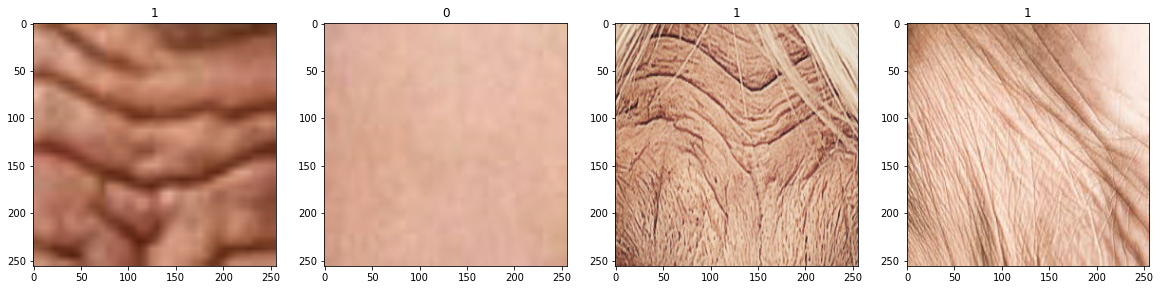

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,imag in enumerate(batch[0][:4]):
  ax[idx].imshow(imag)
  ax[idx].title.set_text(batch[1][idx])

#**PreProcessing**#

In [ ]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
scaled_it=data.as_numpy_iterator()
batch=scaled_it.next()
batch[0].min()

0.0

In [ ]:
len(data)

24

In [ ]:
train_size=int(len(data)*0.75)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)
train_size+val_size+test_size

24

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

#**CNN Model**#

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
18/18 [==============================] - 41s 2s/step - loss: 0.6482 - accuracy: 0.6892 - val_loss: 0.7560 - val_accuracy: 0.5469
Epoch 2/20
18/18 [==============================] - 40s 2s/step - loss: 0.6865 - accuracy: 0.5521 - val_loss: 0.6527 - val_accuracy: 0.5859
Epoch 3/20
18/18 [==============================] - 41s 2s/step - loss: 0.6313 - accuracy: 0.6597 - val_loss: 0.6402 - val_accuracy: 0.6484
Epoch 4/20
18/18 [==============================] - 41s 2s/step - loss: 0.6656 - accuracy: 0.6337 - val_loss: 0.6950 - val_accuracy: 0.5703
Epoch 5/20
18/18 [==============================] - 42s 2s/step - loss: 0.6461 - accuracy: 0.5938 - val_loss: 0.7038 - val_accuracy: 0.5625
Epoch 6/20
18/18 [==============================] - 42s 2s/step - loss: 0.6263 - accuracy: 0.6562 - val_loss: 0.6355 - val_accuracy: 0.6562
Epoch 7/20
18/18 [==============================] - 41s 2s/step - loss: 0.6276 - accuracy: 0.6858 - val_loss: 0.6467 - val_accuracy: 0.6719
Epoch 8/20
18/18 [==

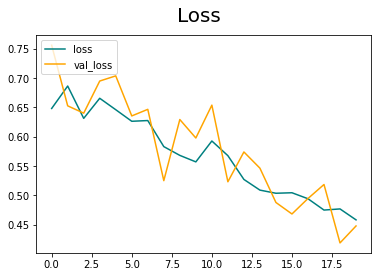

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

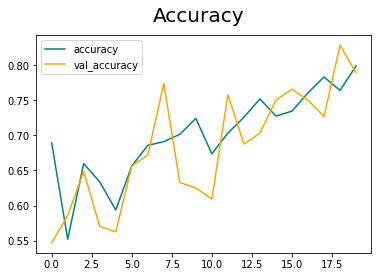

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 360ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.88235295, shape=(), dtype=float32) tf.Tensor(0.6, shape=(), dtype=float32) tf.Tensor(0.76, shape=(), dtype=float32)


In [ ]:
test_img1='/gdrive/MyDrive/20875687-old-woman-close-up-of-wrinkled-face.webp'
test_img2='/gdrive/MyDrive/Shivani-the-Indian-artist-from-Now-United.webp'

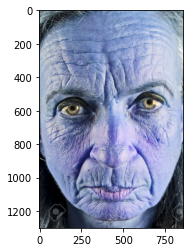

In [ ]:
img=cv2.imread(test_img1)
plt.imshow(img)
plt.show()

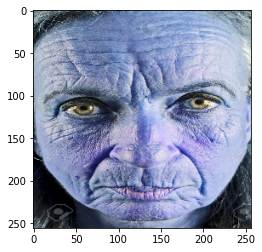

In [ ]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat>0.5:
  print('Wrinkles present')
else:
  print('Wrinkles not present')

Wrinkles present


In [ ]:
res=model.predict(test)

2/2 [==============================] - 4s 271ms/step


In [ ]:
res

array([[4.44799244e-01],
       [3.26007128e-01],
       [6.38806522e-01],
       [3.23525727e-01],
       [7.20553279e-01],
       [9.72417772e-01],
       [3.88037115e-01],
       [1.00000000e+00],
       [3.26007128e-01],
       [3.26007128e-01],
       [1.82641163e-01],
       [4.04646605e-01],
       [3.26007128e-01],
       [7.00506210e-01],
       [3.26007128e-01],
       [9.99999881e-01],
       [9.94957566e-01],
       [2.46431142e-01],
       [3.26007128e-01],
       [1.48713872e-01],
       [3.26007128e-01],
       [5.15763998e-01],
       [7.04449654e-01],
       [3.26007128e-01],
       [3.15997958e-01],
       [3.12280685e-01],
       [3.33741307e-01],
       [3.04420680e-01],
       [4.45561379e-01],
       [3.26007128e-01],
       [3.26007128e-01],
       [1.87192857e-01],
       [1.91893123e-04],
       [9.95228067e-02],
       [4.17183012e-01],
       [3.26007128e-01],
       [1.00000000e+00],
       [3.26007128e-01],
       [3.26007128e-01],
       [9.60838437e-01],


In [ ]:
resarray=[]
for i in res:
  if i>0.5:
    resarray.append('Wrinkles present')
  else:
    resarray.append('Wrinkles not present')

In [ ]:
resarray

['Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles not present',
 'Wrinkles present',
 'Wrinkles not present',
 'Wrinkles not pres